In [1]:
import spacy
import os
from spacy.lang.en import English
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from statistics import mean
from sklearn.model_selection import train_test_split, GridSearchCV
import gensim
from gensim import corpora
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from sklearn.decomposition import LatentDirichletAllocation as LDA
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("vader_lexicon")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jackd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jackd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jackd\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
#Functions to get information for topic labelling
spacy.load('en_core_web_sm')
parser = English()
stop_words = nltk.corpus.stopwords.words('english')
def tokenize(text):#tokenize text
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

#lemma words
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
#Preprocess test
def prep_text(text):
    tokens = tokenize(text)#tokenize the snetence
    tokens = [token for token in tokens if len(token) > 4]#checks length
    tokens = [token for token in tokens if token not in stop_words]#remove stopwords
    tokens = [get_lemma(token) for token in tokens]#gets leamma for tokes
    return tokens

In [3]:
accounts_data = []
biology_data = []
geography_data = []
history_data = []
maths_data = []
physics_data = []
software_data = []

#reads in eacg file in each folder and colects the tokens with the above funcitons
for root, subFolders, files in os.walk('data_assessment_2/data_for_topic_labelling/accounts/'):
    for file in tqdm(files):
        file_name = root + "/" + file
        with open(file_name, encoding='utf8') as f:
            for line in f:
                tokens = prep_text(line)
                if random.random() > 0.99:
                    accounts_data.append(tokens)
                    
for root, subFolders, files in os.walk('data_assessment_2/data_for_topic_labelling/biology/'):
    for file in tqdm(files):
        file_name = root + "/" + file
        with open(file_name, encoding='utf8') as f:
            for line in f:
                tokens = prep_text(line)
                if random.random() > 0.99:
                    biology_data.append(tokens)

for root, subFolders, files in os.walk('data_assessment_2/data_for_topic_labelling/geography/'):
    for file in tqdm(files):
        file_name = root + "/" + file
        with open(file_name, encoding='utf8') as f:
            for line in f:
                tokens = prep_text(line)
                if random.random() > 0.99:
                    geography_data.append(tokens)
                    
for root, subFolders, files in os.walk('data_assessment_2/data_for_topic_labelling/history/'):
    for file in tqdm(files):
        file_name = root + "/" + file
        with open(file_name, encoding='utf8') as f:
            for line in f:
                tokens = prep_text(line)
                if random.random() > 0.99:
                    history_data.append(tokens)
                    
for root, subFolders, files in os.walk('data_assessment_2/data_for_topic_labelling/maths/'):
    for file in tqdm(files):
        file_name = root + "/" + file
        with open(file_name, encoding='utf8') as f:
            for line in f:
                tokens = prep_text(line)
                if random.random() > 0.99:
                    maths_data.append(tokens)
                    
for root, subFolders, files in os.walk('data_assessment_2/data_for_topic_labelling/physics/'):
    for file in tqdm(files):
        file_name = root + "/" + file
        with open(file_name, encoding='utf8') as f:
            for line in f:
                tokens = prep_text(line)
                if random.random() > 0.99:
                    physics_data.append(tokens)
                    
for root, subFolders, files in os.walk('data_assessment_2/data_for_topic_labelling/software/'):
    for file in tqdm(files):
        file_name = root + "/" + file
        with open(file_name, encoding='utf8') as f:
            for line in f:
                tokens = prep_text(line)
                if random.random() > 0.99:
                    software_data.append(tokens)

100%|███████████████████████████████████████████████████████████████████████████████| 642/642 [00:06<00:00, 104.08it/s]


In [4]:
#Remove blank results from the lsits
accounts_data = [x for x in accounts_data if x != []]
biology_data = [x for x in biology_data if x != []]
geography_data = [x for x in geography_data if x != []]
history_data = [x for x in history_data if x != []]
maths_data = [x for x in maths_data if x != []]
physics_data = [x for x in physics_data if x != []]
software_data = [x for x in software_data if x != []]

In [5]:
#split the data into test train split
account_train, account_test = train_test_split(accounts_data)
biology_train, biology_test = train_test_split(biology_data)
geography_train, geography_test = train_test_split(geography_data)
history_train, history_test = train_test_split(history_data)
maths_train, maths_test = train_test_split(maths_data)
physics_train, physics_test = train_test_split(physics_data)
software_train, software_test = train_test_split(software_data)

In [6]:
#create features for lda model
features = []
features.extend(account_train)
features.extend(biology_train)
features.extend(geography_train)
features.extend(history_train)
features.extend(maths_train)
features.extend(physics_train)
features.extend(software_train)

#test for lda model
test = []
test.extend(account_test)
test.extend(biology_test)
test.extend(geography_test)
test.extend(history_test)
test.extend(maths_test)
test.extend(physics_test)
test.extend(software_test)

In [8]:
dictionary = corpora.Dictionary(features)#create a dictionary based on words in features
corpus = [dictionary.doc2bow(text) for text in features]#bag of words for dictionary

#lda model and topics extracted
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word=dictionary, passes=15, per_word_topics=True)

In [9]:
coherance_model_lda = CoherenceModel(model=ldamodel, texts = features, dictionary=dictionary, coherence='c_v')
coherance_lda = coherance_model_lda.get_coherence()
print("Coherance score: ", coherance_lda)

#Coherance_model to check for accuracy of the LDA

Coherance score:  0.6641914788403056


Method 2 - predicted based on bag of words

In [10]:
def features2(data):
    dictionary_t = corpora.Dictionary(data)
    corpus_t = [dictionary_t.doc2bow(text) for text in data]
    return corpus_t

In [11]:
acc_train = features2(account_train)#get bag of words based on each topic for both train and test sets
bio_train = features2(biology_train)
geo_train = features2(geography_train)
hist_train = features2(history_train)
math_train = features2(maths_train)
phy_train = features2(physics_train)
soft_train = features2(software_train)

acc_test = features2(account_test)
bio_test = features2(biology_test)
geo_test = features2(geography_test)
hist_test = features2(history_test)
math_test = features2(maths_test)
phy_test = features2(physics_test)
soft_test = features2(software_test)

In [12]:
acc_train_lab = []#generate labels to macth bag of words for scoring classifier
bio_train_lab = []
geo_train_lab = []
hist_train_lab = []
math_train_lab = []
phy_train_lab = []
soft_train_lab = []

acc_test_lab = []
bio_test_lab = []
geo_test_lab = []
hist_test_lab = []
math_test_lab = []
phy_test_lab = []
soft_test_lab = []

for i in range(len(acc_train)):
    acc_train_lab.append('accounts')
    
for i in range(len(bio_train)):
    bio_train_lab.append('biology')
    
for i in range(len(geo_train)):
    geo_train_lab.append('geopgrahy')
    
for i in range(len(hist_train)):
    hist_train_lab.append('history')
    
for i in range(len(math_train)):
    math_train_lab.append('maths')
    
for i in range(len(phy_train)):
    phy_train_lab.append('physics')
    
for i in range(len(soft_train)):
    soft_train_lab.append('software')

#Test_labels
for i in range(len(acc_test)):
    acc_test_lab.append('accounts')
    
for i in range(len(bio_test)):
    bio_test_lab.append('biology')
    
for i in range(len(geo_test)):
    geo_test_lab.append('geography')
    
for i in range(len(hist_test)):
    hist_test_lab.append('history')
    
for i in range(len(maths_test)):
    math_test_lab.append('maths')
    
for i in range(len(phy_test)):
    phy_test_lab.append('physics')
    
for i in range(len(soft_test)):
    soft_test_lab.append('software')
    

In [13]:
train_acc = []#prep bag of words for classification
train_bio = []
train_geo = []
train_hist = []
train_math = []
train_phy = []
train_soft = []

test_acc = []
test_bio = []
test_geo = []
test_hist = []
test_math = []
test_phy = []
test_soft = []

for i in range(len(acc_train)):
    train_acc.append(acc_train[i][0])

for i in range(len(acc_test)):
    test_acc.append(acc_test[i][0])
    
for i in range(len(bio_train)):
    train_bio.append(bio_train[i][0])

for i in range(len(bio_test)):
    test_bio.append(bio_test[i][0])
    
for i in range(len(geo_train)):
    train_geo.append(geo_train[i][0])

for i in range(len(geo_test)):
    test_geo.append(geo_test[i][0])
    
for i in range(len(hist_train)):
    train_hist.append(hist_train[i][0])

for i in range(len(hist_test)):
    test_hist.append(hist_test[i][0])
    
for i in range(len(math_train)):
    train_math.append(math_train[i][0])

for i in range(len(math_test)):
    test_math.append(math_test[i][0])
    
for i in range(len(phy_train)):
    train_phy.append(phy_train[i][0])

for i in range(len(phy_test)):
    test_phy.append(phy_test[i][0])
    
for i in range(len(soft_train)):
    train_soft.append(soft_train[i][0])

for i in range(len(soft_test)):
    test_soft.append(soft_test[i][0])
    
train_acc = np.array(train_acc)
train_bio = np.array(train_bio)
train_geo = np.array(train_geo)
train_hist = np.array(train_hist)
train_math = np.array(train_math)
train_phy = np.array(train_phy)
train_soft = np.array(train_soft)

test_acc = np.array(test_acc)
test_bio = np.array(test_bio)
test_geo = np.array(test_geo)
test_hist = np.array(test_hist)
test_math = np.array(test_math)
test_phy = np.array(test_phy)
test_soft = np.array(test_soft)

In [14]:
train_feat = []
train_feat.extend(train_acc)
train_feat.extend(train_bio)
train_feat.extend(train_geo)
train_feat.extend(train_hist)
train_feat.extend(train_math)
train_feat.extend(train_phy)
train_feat.extend(train_soft)

train_labels = []
train_labels.extend(acc_train_lab)
train_labels.extend(bio_train_lab)
train_labels.extend(geo_train_lab)
train_labels.extend(hist_train_lab)
train_labels.extend(math_train_lab)
train_labels.extend(phy_train_lab)
train_labels.extend(soft_train_lab)

test_feat = []
test_feat.extend(test_acc)
test_feat.extend(test_bio)
test_feat.extend(test_geo)
test_feat.extend(test_hist)
test_feat.extend(test_math)
test_feat.extend(test_phy)
test_feat.extend(test_soft)

test_labels = []
test_labels.extend(acc_test_lab)
test_labels.extend(bio_test_lab)
test_labels.extend(geo_test_lab)
test_labels.extend(hist_test_lab)
test_labels.extend(math_test_lab)
test_labels.extend(phy_test_lab)
test_labels.extend(soft_test_lab)

In [15]:
param = {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['linear', 'rbf']}#hyper parameter tuning
Tune_SVC = GridSearchCV(estimator=SVC(), param_grid=param, cv=10, scoring='accuracy')
Tune_SVC.fit(train_feat, train_labels)
print("Best Parameters:")
print(Tune_SVC.best_estimator_)

df_SVC = pd.DataFrame({'parameters':Tune_SVC.cv_results_["params"], 'Mean_Accuracy':Tune_SVC.cv_results_["mean_test_score"]})
df_SVC

Best Parameters:
SVC(C=10, gamma=0.001, kernel='linear')


,parameters,Mean_Accuracy
0,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.276697
1,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.231132
2,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.276697
3,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.273550
4,"{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}",0.281884
5,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.227019
6,"{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}",0.281884
7,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.246596
8,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}",0.281884
9,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.232131


Prediction accuracy = 0.2883435582822086


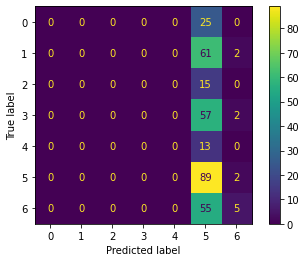

In [16]:
clf = SVC(C=1, gamma=0.001, kernel='linear')#build and test model
clf.fit(train_feat, train_labels)

predict = clf.predict(test_feat)

matrix = confusion_matrix(test_labels, predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix= matrix)

print('Prediction accuracy =', accuracy_score(test_labels, predict))
cm_display.plot()
plt.show()

In [17]:
#Could not get input to work for this task